In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [446]:
# promoter signal testing: simulate a signal as a step function that oscillates between 0 "OFF" and 1 "ON" with
# OFF and ON wait times distributed according to respective exponential probability distributions.

def telegraph(k_on, k_off, duration, stepsize):
# k_on is exponential distribution clustering paramter for "ON" states, k_off for "OFF"
# duration is the total simulation time, in seconds
# stepsize is the number of seconds per step (e.g. 3 seconds per observation)

    on_off = np.zeros((duration//stepsize))                                             # create array of on-off durations
    on_off[0::2] = np.random.exponential(scale=(1./k_off), size=len(on_off[0::2]))      # fill every other value with exponentially-distributed off durations
    on_off[1::2] = np.random.exponential(scale=(1./k_on), size=len(on_off[1::2]))       # then fill in every other place with "ON" durations

    promoter_arr = np.zeros((duration//stepsize))
        
    signal = 0           # start in the off state
    t0 = 0               # start at t0
    t1 = 0               # step size to be chosen in loop
    
    step_arr = np.zeros(duration//stepsize)
                                
    for i in range(len(promoter_arr)):
        t1 = int(on_off[i] / stepsize)              # find the time until which the signal remains in its state
        promoter_arr[t0:(t0 + t1)] = signal         # for the given duration of the ith state, fill the value with either "ON" or "OFF" values
        signal = 1 - signal                         # change the signal by flipping the switch to either 1 or 0.
        t0 = t0 + t1
        step_arr[i] = t0                            # 

    return promoter_arr                             # returns telegraph signal of promoter indexed by stepsize (discrete steps).
    

In [285]:
sig = telegraph(0.05, 0.03, 555, 3)

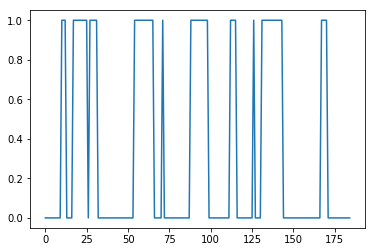

In [286]:
plt.plot(sig)

In [301]:
# now add in signal agglomeration. When the signal is 1, start the agglomeration of molecules at a given rate k_gfp.
# This function returns counts 

def gfp_signal(telegraph, k_gfp, cts_per_gfp, k_polII, max_loops, stepsize):
    
    
    loops_per_step = k_gfp / stepsize          # get k_gfp from molecules / sec --> molecules / step
    
    polII_per_step = k_polII / stepsize    # start rate of polII in terms of discrete timesteps

    molecule_signal = np.zeros(len(telegraph))    # empty array of mRNA-GFP loops
    
    polII_arr = []   # empty array of polII molecules that will grow according to the pol_per_step rate.
                     # This is a list of strands of molecules
    
    max_loops = 24   # max number of GFP loops per strand
    counter = 0      # keep track of how many time steps we've taken since we added the last polII molecule
    loopnum = 0      # keep track of the number of steps we've taken since we added the last loop

    
    for s in range(len(telegraph)):         # iterate by time step
        
        if telegraph[s] == 1:               # When the telegraph signal is ON, start a new pol II molecule according to pol_per_step
            counter += 1
            if (counter/polII_per_step) >= 1:       # if we passed the start point of a new polII, add a new pol II molecule
                polII_arr = np.append(polII_arr, 0)
                counter = 0                         # restart counter
                        
        loopnum += 1

        if (loopnum/loops_per_step) >= 1:        # add a new loop to each polII molecule in the loop array according to loop rate               
            polII_arr = [j+1 for j in polII_arr] 
            loopnum = 0                          # reset the loop counter for the discretized rate.
            
        #for i in range(len(polII_arr)):
            #if polII_arr[i] > max_loops:
                #polII_arr[i] = 0            # if we've gone over the max number of loops, set polII element to zero since 
                                            # the chain of GFP attached to that polII will decay really quickly 

        keep = np.asarray(polII_arr) <= max_loops
            
                
        
        molecule_signal[s] = sum(keep*polII_arr)    # sum up the number of GFP molecules from the polII list
        
        
        loopnum=0

    return molecule_signal*cts_per_gfp, polII_arr
            
        

In [302]:
gfp,pol = gfp_signal(telegraph=sig, k_gfp=3, cts_per_gfp=1000, k_polII=1, max_loops=24, stepsize=3 )

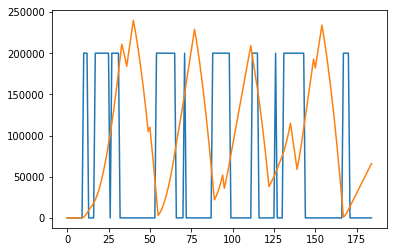

In [304]:
plt.plot(sig*200000)
plt.plot(gfp)


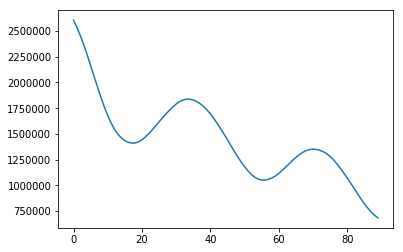

In [299]:
auto = np.correlate(gfp,gfp, mode='same')  # 

plt.plot(auto[95:])

In [ ]:
plt.plot()

In [197]:
pol

[3, 21, 22, 3]

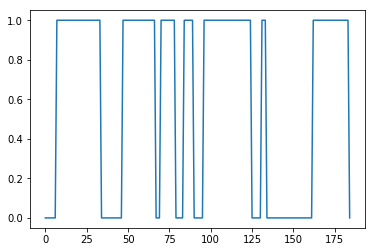

In [80]:
plt.plot(sig)

In [66]:
pol_arr

NameError: name 'pol_arr' is not defined

In [54]:
a = [3, 4, 5]
if (i for i in a) == 3:
    a[i] == 3
else:
    a = [i+1 for i in a]

In [64]:
a = []
a + 1

TypeError: can only concatenate list (not "int") to list

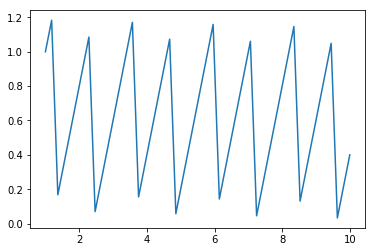

In [35]:
x = np.linspace(1,10)
plt.plot(x, (x%1.2))

In [34]:
x

array([ 1.        ,  1.18367347,  1.36734694,  1.55102041,  1.73469388,
        1.91836735,  2.10204082,  2.28571429,  2.46938776,  2.65306122,
        2.83673469,  3.02040816,  3.20408163,  3.3877551 ,  3.57142857,
        3.75510204,  3.93877551,  4.12244898,  4.30612245,  4.48979592,
        4.67346939,  4.85714286,  5.04081633,  5.2244898 ,  5.40816327,
        5.59183673,  5.7755102 ,  5.95918367,  6.14285714,  6.32653061,
        6.51020408,  6.69387755,  6.87755102,  7.06122449,  7.24489796,
        7.42857143,  7.6122449 ,  7.79591837,  7.97959184,  8.16326531,
        8.34693878,  8.53061224,  8.71428571,  8.89795918,  9.08163265,
        9.26530612,  9.44897959,  9.63265306,  9.81632653, 10.        ])

In [27]:
22/1.2

18.333333333333336

In [6]:
a[1] = 2